In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  


In [2]:
data=pd.read_csv('/work/housingdata.csv')
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = housing_colnames
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


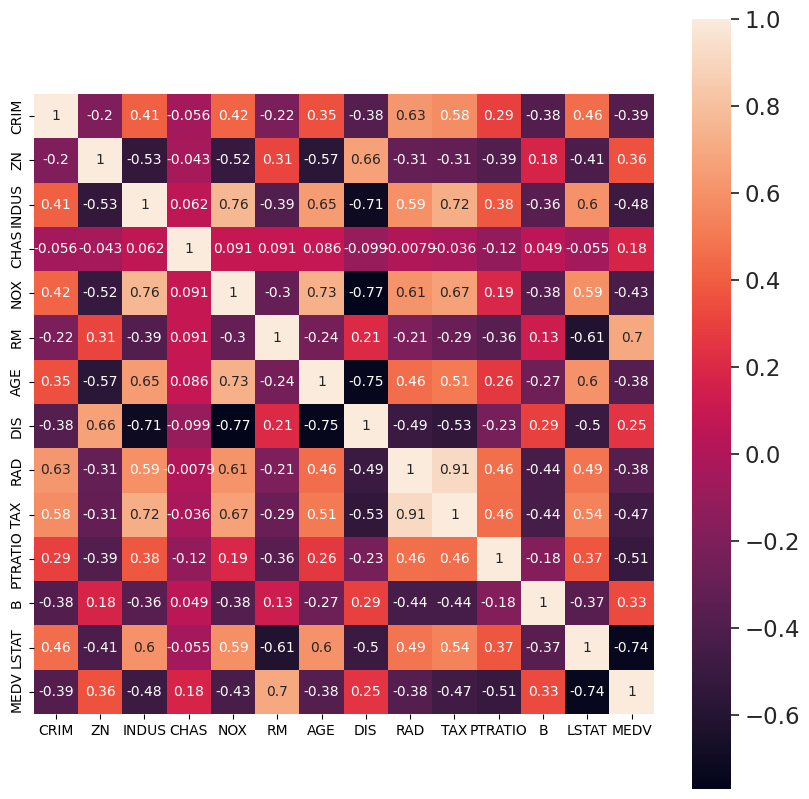

In [5]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [6]:
x=data['RM'].values
y=data['MEDV'].values

In [8]:
train_x,test_x=x[:int((x.size)*.75)],x[int((x.size)*.75)+1:]
train_y,test_y=y[:int((y.size)*.75)],y[int((y.size)*.75)+1:]

In [ ]:
def finding_co(x, y): 
    total_size = x.size 
    
    mean_x, mean_y = np.mean(x), np.mean(y) 
  
    m = ((x - mean_x) * (y - mean_y)).sum()/((x - mean_x)*(x-mean_x)).sum() 
  
    c = mean_y - m*mean_x 
    
    return(c, m) 


In [14]:
c,m=finding_co(train_x,train_y)

In [ ]:
def draw_line(x, y, m,c): 
    
    plt.scatter(x, y, color = "r", marker = "o", s = 30) 
   
    y_pred = m*x + c
  
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('Avarage no of rooms') 
    plt.ylabel('Price') 
    plt.show() 

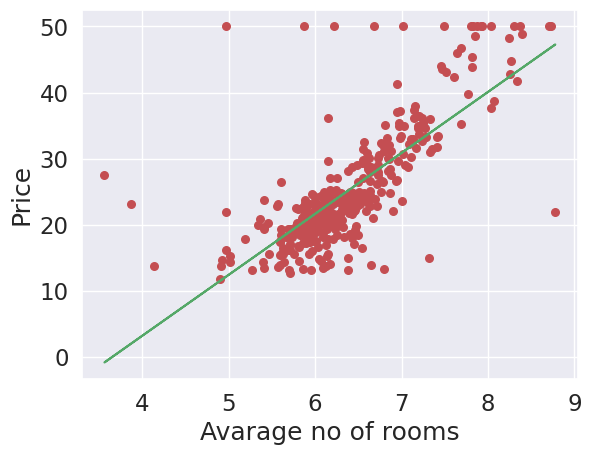

In [ ]:
draw_line(train_x, train_y, m,c)

In [19]:
def pridect(x,m,c):
    predicted_value = m*x+c
    return predicted_value

In [33]:
predicted_value=pridect(test_x,m,c)
output=pd.DataFrame({'Predicted':predicted_value, 'Actual': test_y})
output.head(10)

,Predicted,Actual
0,30.569204,10.4
1,26.669053,10.9
2,17.365856,11.3
3,17.218333,12.3
4,6.596646,8.8
5,14.977821,7.2
6,9.215187,10.5
7,12.423822,7.4
8,11.317396,10.2
9,16.019705,11.5


In [36]:
mean_error=abs(predicted_value -test_y).sum()/len(test_y)
mean_error

7.7009893780894645

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87efde85-a815-4ac6-9936-9818d283592d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>